## Criamos um dataset para exemplificar o estudo da PCA
### Após a criação/importação do Dataset, precisamos entender o que queremos.
### É fundamental entender qual é o objetivo do estudo, qual é a necessidade.
### Vamos supor que queremos saber qual o melhor "custo-benefício" dentre os automóveis citados - OBJETIVO: CUSTO-BENEFÍCIO

In [3]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np

In [4]:
# CRIANDO UM DATASET E ANALISANDO VISUALMENTE (ISSO É FUNDAMENTAL PARA ENTENDERMOS O DATASET)
# Valores e dados reais de Janeiro de 2023.
auto = {'modelo': ['Strada CS', 'Gol msi', 'Onix hb', 'Ka hb','Hb20', 'Kwid'],
              'motor':[1.4, 1.0, 1.0, 1.0, 1.0, 1.0], 
              'km/litro_gas_cid': [10.8, 13.3, 13.9, 13.4, 12.8, 14.9],
              'km/litro_gas_est': [12.3, 14.4, 16.7, 15.5, 14.6, 15.6],
              'km/litro_alc_cid': [7.4, 9.1, 9.9, 9.2, 9.1, 10.3],
              'km/litro_alc_est': [8.5, 10.1, 11.7, 10.7, 10.1, 10.6],
              'peso/kg': [1.151, 1.001, 1.037, 1.037, 1.091, 0.779],
              'torque_gas': [13.7, 9.7, 9.6, 10.2, 9.4, 9.4],
              'torque_alc': [14.2, 10.4, 10.6, 10.7, 10.2, 9.8],
              'cavalos_gas': [85, 75, 78, 80, 75, 66],
              'cavalos_alc': [88, 84, 82, 85, 80, 70],
              'valor': [93.890, 63.738, 63.430, 49.890, 63.690, 42.690]       
       }                

In [5]:
# VISUALIZANDO O DATASET
df =pd.DataFrame(auto)
print(df)

      modelo  motor  km/litro_gas_cid  km/litro_gas_est  km/litro_alc_cid  \
0  Strada CS    1.4              10.8              12.3               7.4   
1    Gol msi    1.0              13.3              14.4               9.1   
2    Onix hb    1.0              13.9              16.7               9.9   
3      Ka hb    1.0              13.4              15.5               9.2   
4       Hb20    1.0              12.8              14.6               9.1   
5       Kwid    1.0              14.9              15.6              10.3   

   km/litro_alc_est  peso/kg  torque_gas  torque_alc  cavalos_gas  \
0               8.5    1.151        13.7        14.2           85   
1              10.1    1.001         9.7        10.4           75   
2              11.7    1.037         9.6        10.6           78   
3              10.7    1.037        10.2        10.7           80   
4              10.1    1.091         9.4        10.2           75   
5              10.6    0.779         9.4      

In [6]:
# BUSCANDO AS INFORMAÇÕES DO DATASET, SEGUINDO O ROTEIRO DO ChatGPT.
# O NOSSO DATASET É PEQUENO, MAS VAMOS SEGUIR O PROTOCOLO.
df.describe() # A função "describe()" nos traz a estatística básica. Podemos destacar a média "mean", que 
# nos trás dados interessante que nos ajudam a entender melhor o que queremos.

,motor,km/litro_gas_cid,km/litro_gas_est,km/litro_alc_cid,km/litro_alc_est,peso/kg,torque_gas,torque_alc,cavalos_gas,cavalos_alc,valor
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.066667,13.183333,14.850000,9.166667,10.283333,1.016000,10.333333,10.983333,76.500000,81.500000,62.888000
std,0.163299,1.367358,1.494992,0.995322,1.051507,0.127378,1.675311,1.608001,6.348228,6.252999,17.548166
min,1.000000,10.800000,12.300000,7.400000,8.500000,0.779000,9.400000,9.800000,66.000000,70.000000,42.690000
25%,1.000000,12.925000,14.450000,9.100000,10.100000,1.010000,9.450000,10.250000,75.000000,80.500000,53.275000
50%,1.000000,13.350000,15.050000,9.150000,10.350000,1.037000,9.650000,10.500000,76.500000,83.000000,63.560000
75%,1.000000,13.775000,15.575000,9.725000,10.675000,1.077500,10.075000,10.675000,79.500000,84.750000,63.726000
max,1.400000,14.900000,16.700000,10.300000,11.700000,1.151000,13.700000,14.200000,85.000000,88.000000,93.890000


In [7]:
df.info() # A função "info()" nos dá um panorama dos tipo de dados e a sua condição.
          # Veja que não temos dados nulos (Null) e os tipos estão descritos corretamente, onde precisa
          # ser texto está "object(string)" ou ainda,onde precisa ser número está "Float/Int (Float64/int64)" 
          # É importante lembrar que nem sempre é assim. É muito comum termo valores nulos e descritos de 
          # de forma equivocada. Ex: A coluna "motor" poderia está como "object" e seria necessário
          # o tratamento adequado de TRANSFORMAÇÃO DOS DADOS para transformá-los em numéricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   modelo            6 non-null      object 
 1   motor             6 non-null      float64
 2   km/litro_gas_cid  6 non-null      float64
 3   km/litro_gas_est  6 non-null      float64
 4   km/litro_alc_cid  6 non-null      float64
 5   km/litro_alc_est  6 non-null      float64
 6   peso/kg           6 non-null      float64
 7   torque_gas        6 non-null      float64
 8   torque_alc        6 non-null      float64
 9   cavalos_gas       6 non-null      int64  
 10  cavalos_alc       6 non-null      int64  
 11  valor             6 non-null      float64
dtypes: float64(9), int64(2), object(1)
memory usage: 704.0+ bytes


In [8]:
# A função corr() é usada para calcular a correlação entre duas variáveis. A correlação pode ser medida como 
# Pearson, Spearman ou Kendall(falaremos de ccada uma em outros arquivos), que medem a relação linear, 
# monotônica ou de ranking entre as variáveis. A saída será a matriz de correlação entre as colunas de df, 
# mostrando a relação linear entre as variáveis. Valores próximos a 1 indicam uma forte correlação positiva, 
# valores próximos a -1 indicam uma forte correlação negativa, e valores próximos a 0 indicam ausência de 
# correlação respectivamente.A correlação positiva indica que duas variáveis aumentam juntas. 
# Quando uma das variáveis aumenta, a outra também aumenta, e vice-versa. Por exemplo, se a quantidade de 
# horas de estudo aumenta, a probabilidade de uma pessoa ter uma boa nota também aumenta.
# Já a correlação negativa indica que duas variáveis se movem em direções opostas. Quando uma das variáveis
# aumenta, a outra diminui, e vice-versa. Por exemplo, se a temperatura aumenta, a demanda por energia para
# ar condicionado diminui.
# Em ambos os casos, quanto mais próximo de 1 ou -1, mais forte é a correlação entre as variáveis. 
# Valores próximos a zero indicam ausência de correlação.
df.corr()

,motor,km/litro_gas_cid,km/litro_gas_est,km/litro_alc_cid,km/litro_alc_est,peso/kg,torque_gas,torque_alc,cavalos_gas,cavalos_alc,valor
motor,1.000000,-0.853903,-0.835617,-0.869554,-0.830857,0.519212,0.984488,0.979999,0.655952,0.509249,0.865493
km/litro_gas_cid,-0.853903,1.000000,0.868315,0.985578,0.827430,-0.849163,-0.864055,-0.891583,-0.830617,-0.777770,-0.926853
km/litro_gas_est,-0.835617,0.868315,1.000000,0.911291,0.993006,-0.505699,-0.815308,-0.792446,-0.494176,-0.486726,-0.779379
km/litro_alc_cid,-0.869554,0.985578,0.911291,1.000000,0.876499,-0.780866,-0.892767,-0.902646,-0.807149,-0.774453,-0.890952
km/litro_alc_est,-0.830857,0.827430,0.993006,0.876499,1.000000,-0.430494,-0.806842,-0.771419,-0.429949,-0.403037,-0.722239
peso/kg,0.519212,-0.849163,-0.505699,-0.780866,-0.430494,1.000000,0.559518,0.635374,0.903014,0.888140,0.783627
torque_gas,0.984488,-0.864055,-0.815308,-0.892767,-0.806842,0.559518,1.000000,0.991375,0.737171,0.603300,0.838635
torque_alc,0.979999,-0.891583,-0.792446,-0.902646,-0.771419,0.635374,0.991375,1.000000,0.788601,0.657396,0.892887
cavalos_gas,0.655952,-0.830617,-0.494176,-0.807149,-0.429949,0.903014,0.737171,0.788601,1.000000,0.944692,0.769190
cavalos_alc,0.509249,-0.777770,-0.486726,-0.774453,-0.403037,0.888140,0.603300,0.657396,0.944692,1.000000,0.709915


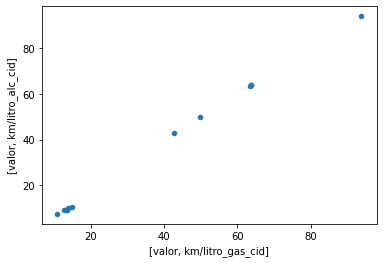

In [9]:
# A finção plo.scatter() nos dá uma visão mais ampla do que vimos na correlação. Repare que, apesar de muito
# simples, fica muito mais fácil entender uma "correlação linear" entre o "valor x km/litro_gas_cid".
# a função corrobora com o que vimos na função "df.corr".
df.plot.scatter((['valor','km/litro_gas_cid']),(['valor','km/litro_alc_cid']));

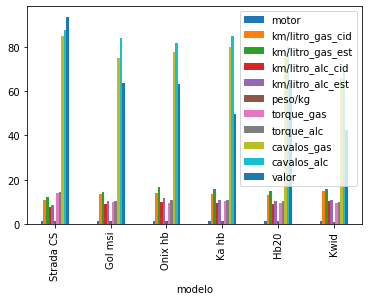

In [10]:
# A função gráfica "df.plot.bar" nos dá um panorama interessante, veja que existe uma certa linearidade
# entre o "valor x cavalos_", logicamente, que precisa ser analisada.
df.plot.bar(x = 'modelo');

In [10]:
# Vamos salvar este dataset.
df.to_csv('cb_br_2022.csv', index = False)

### Continua no "2"